In [ ]:
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([7, 9, 11])
alpha = 0.01
def batch_gradient_descent(X, y, epochs):
    m = len(y)
    weights = np.zeros(X.shape[1])
    for epoch in range(epochs):
        gradients = (1/m) * X.T.dot(X.dot(weights) - y)
        weights -= alpha * gradients
    return weights
weights = batch_gradient_descent(X, y, epochs=1000)
print(weights)


[-2.51713436  4.03991894]


In [ ]:
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([7, 9, 11])
alpha = 0.01
def stochastic_gradient_descent(X, y, epochs ):
  m = len( y)
  weights = np.zeros(X.shape[1])
  for epoch in range(epochs):
    for i in range(m):
      gradients = X[i].T.dot(X[i].dot(weights) - y[i])
      weights -= alpha * gradients
    return weights
weights = stochastic_gradient_descent(X, y, epochs=1000)
print(weights)

[0.646915 0.865218]


In [ ]:
import numpy as np
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([7, 9, 11])
alpha = 0.01
def mini_batch_gradient_descent(X, y, batch_size, epochs):
    m = len(y)
    weights = np.zeros(X.shape[1])
    for epoch in range(epochs):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            gradients = (1 / len(y_batch)) * X_batch.T.dot(X_batch.dot(weights) - y_batch)
            weights -= alpha * gradients
    return weights
weights = stochastic_gradient_descent(X, y, epochs=1000)
print(weights)

[0.646915 0.865218]


In [ ]:
def vectorized_batch_gradient_descent(X, y, epochs):
    m = len(y)
    weights = np.zeros(X.shape[1])
    for epoch in range(epochs):
        gradients = (1/m) * X.T.dot(X.dot(weights) - y)
        weights -= alpha * gradients
    return weights
weights = vectorized_batch_gradient_descent(X, y, epochs=1000)
print(weights)

[-2.51713436  4.03991894]


Template matching in pattern detetction

Please upload two images: one full image and one cropped template.


Saving Screenshot 2025-09-23 124831.png to Screenshot 2025-09-23 124831 (1).png
Saving Screenshot 2025-09-23 124756.png to Screenshot 2025-09-23 124756 (6).png
Uploaded files: ['Screenshot 2025-09-23 124831 (1).png', 'Screenshot 2025-09-23 124756 (6).png']
Files in environment: ['.config', 'Screenshot 2025-09-23 124756 (4).png', 'Screenshot 2025-09-23 124756 (5).png', 'Screenshot 2025-09-23 124756 (1).png', 'Screenshot 2025-09-23 124756 (2).png', 'Screenshot 2025-09-23 124831 (1).png', 'Screenshot 2025-09-23 124756 (3).png', 'Screenshot 2025-09-23 124831.png', 'Screenshot 2025-09-23 124756.png', 'Screenshot 2025-09-23 124756 (6).png', 'sample_data']


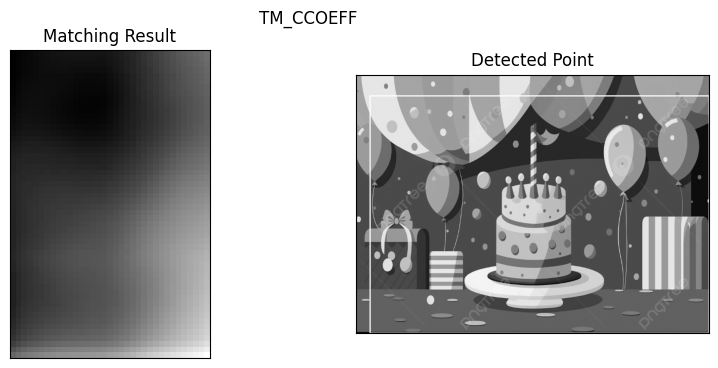

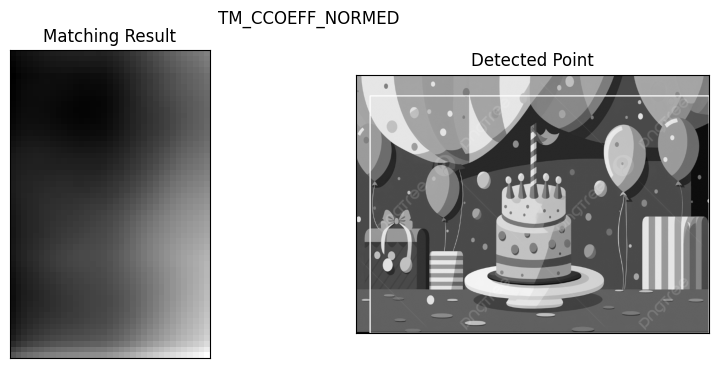

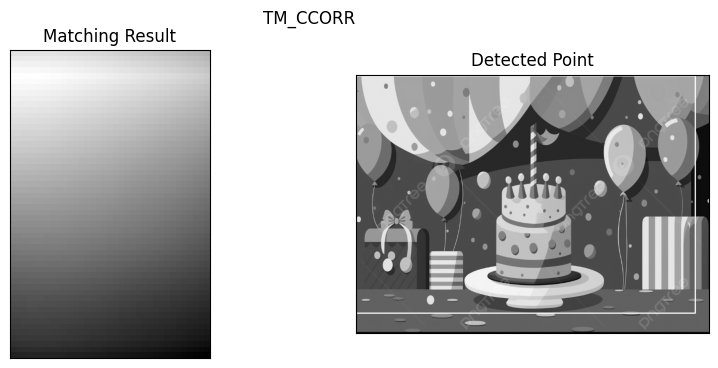

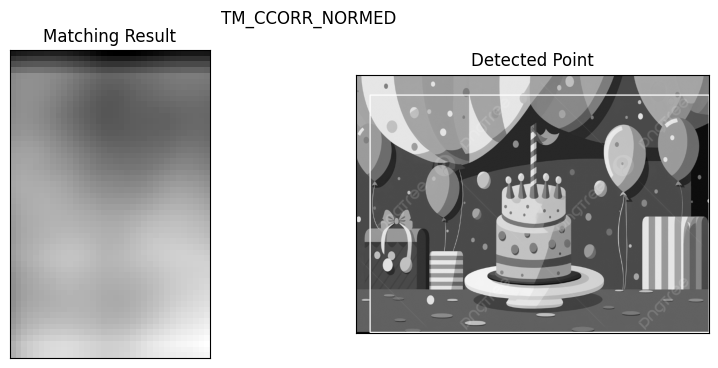

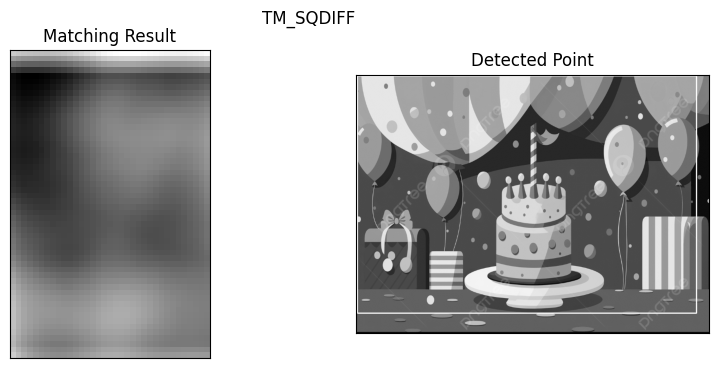

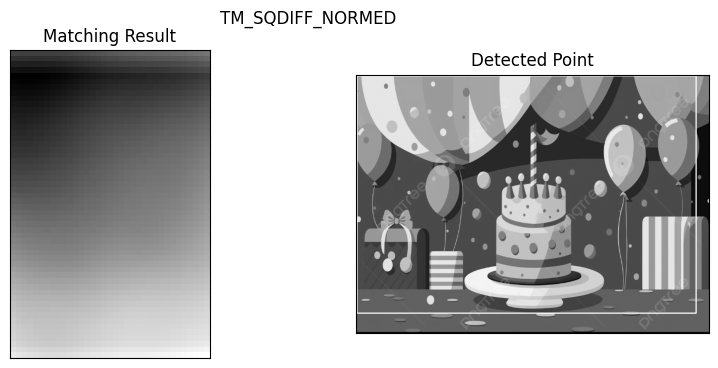

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
from google.colab import files

print("Please upload two images: one full image and one cropped template.")
uploaded = files.upload()

uploaded_files = list(uploaded.keys())
print("Uploaded files:", uploaded_files)
print("Files in environment:", os.listdir())

assert len(uploaded_files) >= 2, "Please upload at least two images: one full image and one template."

source_path = uploaded_files[0]
template_path = uploaded_files[1]

img = cv.imread(source_path, cv.IMREAD_GRAYSCALE)
template = cv.imread(template_path, cv.IMREAD_GRAYSCALE)

assert img is not None, f"Source image '{source_path}' could not be read."
assert template is not None, f"Template image '{template_path}' could not be read."


img2 = img.copy()
w, h = template.shape[::-1]


methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
           'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']


for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)
    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    top_left = min_loc if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right, 255, 2)

    plt.figure(figsize=(10, 4))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

Bob detection


FileUpload(value={}, accept='image/*', description='Upload')

/tmp/ipython-input-3270072775.py:24: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(gray_image)


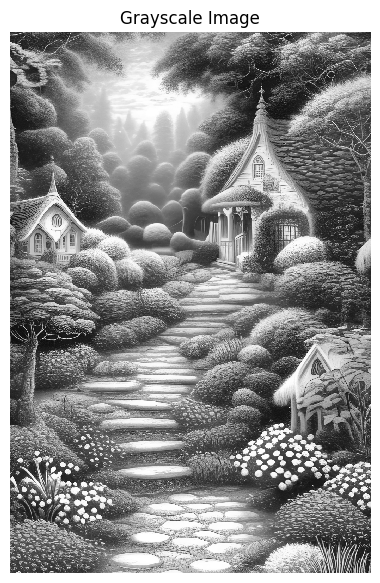

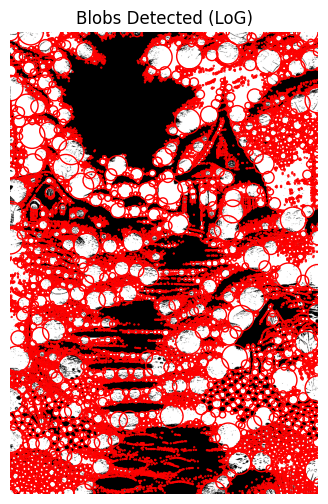

In [6]:
import io
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.feature import blob_log
import ipywidgets as widgets
from IPython.display import display

upload_btn = widgets.FileUpload(accept='image/*', multiple=False)
display(upload_btn)

def handle_upload(change):
    uploaded_file = list(upload_btn.value.values())[0]
    image_data = uploaded_file['content']
    image = imread(io.BytesIO(image_data))

    gray_image = rgb2gray(image)

    im_bw = (gray_image < 0.5) * 1
    im_mask = gray_image < 0.5

    plt.figure(figsize=(6, 6))
    imshow(gray_image)
    plt.axis('off')
    plt.title("Grayscale Image")
    plt.show()

    blobs_log = blob_log(im_mask, max_sigma=30, num_sigma=10, threshold=0.1)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(im_bw, cmap='gray')
    for blob in blobs_log:
        y, x, sigma = blob
        ax.add_patch(plt.Circle((x, y), sigma * np.sqrt(2), color='r', fill=False))
    ax.set_title("Blobs Detected (LoG)")
    ax.axis('off')
    plt.show()

upload_btn.observe(handle_upload, names='value')

Saving grayscale.png to grayscale (1).png


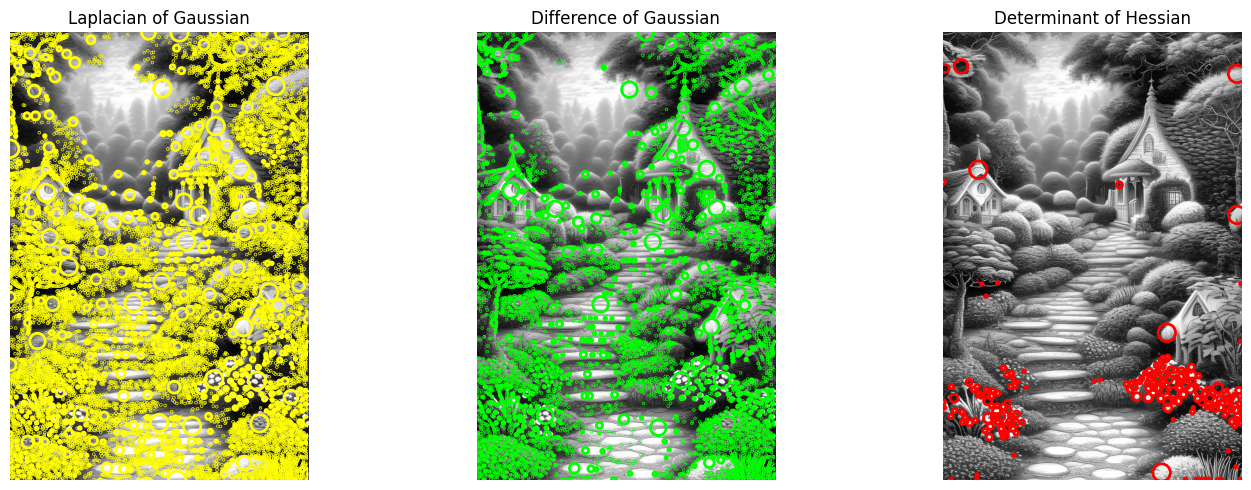

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import blob_log, blob_dog, blob_doh
from google.colab import files
import io

uploaded = files.upload()
image_file = list(uploaded.keys())[0]
image = imread(io.BytesIO(uploaded[image_file]))
gray_image = rgb2gray(image)

blobs_log = blob_log(gray_image, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_dog = blob_dog(gray_image, max_sigma=30, threshold=0.1)
blobs_doh = blob_doh(gray_image, max_sigma=30, threshold=0.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(zip(blobs_list, colors, titles)):
    ax[idx].set_title(title)
    ax[idx].imshow(gray_image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()

combinibg ovencv preprocessing with cnn pipeline for classification


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from skimage.feature import blob_log

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(f"CIFAR-10 loaded: {x_train.shape[0]} training samples, {x_test.shape[0]} test samples")

def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray, (32, 32))
    blurred = cv2.GaussianBlur(resized, (3, 3), 0)
    normalized = blurred / 255.0
    return normalized

print("Starting preprocessing of training images...")
x_train_proc = np.array([preprocess_image(img) for img in x_train])
print("Training images preprocessed")

print("Starting preprocessing of test images...")
x_test_proc = np.array([preprocess_image(img) for img in x_test])
print("Test images preprocessed")

x_train_proc = x_train_proc.reshape(-1, 32, 32, 1)
x_test_proc = x_test_proc.reshape(-1, 32, 32, 1)
print(f"Reshaped images to: {x_train_proc.shape}")

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print("Labels one-hot encoded")

print("🧠 Building CNN model...")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("CNN model compiled")

print("Starting training...")
model.fit(x_train_proc, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)
print("taining complete")

print("Evaluating model on test data...")
test_loss, test_acc = model.evaluate(x_test_proc, y_test_cat)
print(f"Test Accuracy: {test_acc:.2f}")

CIFAR-10 loaded: 50000 training samples, 10000 test samples
Starting preprocessing of training images...
Training images preprocessed
Starting preprocessing of test images...
Test images preprocessed
Reshaped images to: (50000, 32, 32, 1)
Labels one-hot encoded
🧠 Building CNN model...
CNN model compiled
Starting training...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 56s 77ms/step - accuracy: 0.2695 - loss: 2.0015 - val_accuracy: 0.4228 - val_loss: 1.6429
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.4414 - loss: 1.5879 - val_accuracy: 0.4924 - val_loss: 1.4503
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 74ms/step - accuracy: 0.4903 - loss: 1.4627 - val_accuracy: 0.5252 - val_loss: 1.3617
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.5220 - loss: 1.3664 - val_accuracy: 0.5532 - val_loss: 1.2938
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.5517 - loss: 1.2874 - val_accuracy: 0.5724 - val_loss: 1.2472
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 49s 69ms/step - accuracy: 0.5684 - loss: 1.2429 - val_accuracy: 0.5796 - val_loss: 1.2424
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 72ms/step - accuracy: 0.5853 - loss: 1.1977 - val_accuracy: 0.5678 - val_loss: 1.2488
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.5953 - loss: 1.1629 - 